In [ ]:
%env HF_TOKEN=hf_XXX


In [2]:
from smolagents import CodeAgent, InferenceClientModel
import os

model = InferenceClientModel()

# default model
model.client

<InferenceClient(model='Qwen/Qwen2.5-Coder-32B-Instruct', timeout=120)>

In [3]:
from smolagents import CodeAgent, InferenceClientModel

model_id = "meta-llama/Llama-3.3-70B-Instruct" 

llama_model = InferenceClientModel(model_id=model_id, token=os.environ['HF_TOKEN']) # You can choose to not pass any model_id to InferenceClientModel to use a default model
# you can also specify a particular provider e.g. provider="together" or provider="sambanova"
agent = CodeAgent(tools=[], model=llama_model, add_base_tools=True)

agent.run(
    "Could you give me the 118th number in the Fibonacci sequence?",
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you give me the 118th number in the Fibonacci sequence?                                                   │
│                                                                                                                 │
╰─ InferenceClientModel - meta-llama/Llama-3.3-70B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  def fibonacci(n):                                                                                                
      fib_sequence = [0, 1]                                                                                        
      while len(fib_sequence) < n:                                                                                 
          fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])                                                 
      return fib_sequence[-1]                                                                                      
                                                                                                                   
  result = fibonacci(119)  # 119 because list indices start at 0                                                   
  print(result)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
2046711111473984623691759

Out: None

[Step 1: Duration 1.82 seconds| Input tokens: 2,039 | Output tokens: 137]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(2046711111473984623691759)                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 2046711111473984623691759

[Step 2: Duration 0.78 seconds| Input tokens: 4,355 | Output tokens: 196]

2046711111473984623691759

## Claude
<img src="../images/claudefib.png" alt="Claude Screenshot" width="400"/>

## OpenAI
<img src="../images/openaifib.png" alt="OpenAI Screenshot" width="400"/>


## DeepSeek
<img src="../images/deepseekfib.png" alt="DeepSeek Screenshot" width="400"/>

In [12]:
# Llama said 1,264,937,032,042,997,393,488,322
# OpenAI said 2,046,711,111,473,984,623,691,759
# Claude said 4,224,696,333,392,220,272,978,344,770,991,272,720,046,789
# DeepSeek gave code that yields 2,046,711,111,473,984,623,691,759 but then SAID 3,311,648,143,516,982,017,180,081

# sooo who's right? Your homework is to figure out who ;) 
#  Hint, assumptions are being made and the AI's disagree on what assumption to make.

In [4]:
agent.run("Could you get me the title of the page at url 'https://huggingface.co/blog'?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Could you get me the title of the page at url 'https://huggingface.co/blog'?                                    │
│                                                                                                                 │
╰─ InferenceClientModel - meta-llama/Llama-3.3-70B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import re                                                                                                        
  url = 'https://huggingface.co/blog'                                                                              
  page_content = visit_webpage(url)                                                                                
  title = re.search(r'<title>(.*?)</title>', page_content)                                                         
  if title:                                                                                                        
      print(title.group(1))                                                                                        
  else:                                                                                                            
      print("Title not found")                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Title not found

Out: None

[Step 1: Duration 1.63 seconds| Input tokens: 2,045 | Output tokens: 110]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  url = 'https://huggingface.co/blog'                                                                              
  page_content = visit_webpage(url)                                                                                
  print(page_content)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Hugging Face – Blog

[![Hugging Face's logo](/front/assets/huggingface_logo-noborder.svg)
Hugging Face](/)

* [Models](/models)
* [Datasets](/datasets)
* [Spaces](/spaces)
* Community
* [Docs](/docs)
* [Enterprise](/enterprise)
* [Pricing](/pricing)
* ---
* [Log In](/login)
* [Sign Up](/join)

Blog, Articles, and discussions
===============================

New Article

[Everything](/blog)
[community](/blog?tag=community)[guide](/blog?tag=guide)[open source 
collab](/blog?tag=open-source-collab)[partnerships](/blog?tag=partnerships)[research](/blog?tag=research)[NLP](/blo
g?tag=nlp)[Audio](/blog?tag=audio)[CV](/blog?tag=cv)[RL](/blog?tag=rl)[ethics](/blog?tag=ethics)[Diffusion](/blog?t
ag=diffusion)[Game Development](/blog?tag=game-dev)[RLHF](/blog?tag=rlhf)[Leaderboard](/blog?tag=leaderboard)[Case 
Studies](/blog?tag=case-studies)[LeRobot](/blog?tag=lerobot)[Inference Providers](/blog?tag=inference-providers)

[![](/blog/assets/smol2operator/thumbnail.png)

Smol2Operator: Post-Training GUI Agents for Computer Use
--------------------------------------------------------

By 
[A-Mahla](/A-Mahla)

September 23, 2025
•

58](/blog/smol2operator)
Community Articles
[view all](/blog/community)
[#### RexBERT: Encoders for a brave new world of E-Commerce

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/6893dd21467f7d2f5f358a95/3buD-PC8cvzsS__NJjdUi.png)
thebajajra](/thebajajra)
and 1 other
• 
4 days ago
•

34](/blog/thebajajra/rexbert-encoders)
[#### Introducing the Palmyra-mini family: Powerful, lightweight, and ready to reason!

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/1625001569797-60db8b5ad8b4797b129145d5.png)
Writer](/Writer)
and 1 other
• 
13 days ago
•

58](/blog/Writer/announcing-palmyra-mini)
[#### 🌎 What kind of environmental impacts are AI companies disclosing? (And can we compare them?) 🌎

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/60edd0133e2c73a9a21455f5/yK1G-Fv-YjYb7v_chkz3p.jpeg)
sasha](/sasha)
and 1 other
• 
7 days ago
•

10](/blog/sasha/environmental-impact-disclosures)
[#### Unleashing the Full Potential of ERNIE4.5 using FastDeploy

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/64f187a2cc1c03340ac30498/TYYUxK8xD1AxExFMWqbZD.png)
baidu](/baidu)
and 3 others
• 
5 days ago
•

10](/blog/baidu/fastdeploy)
[#### mem-agent: Persistent, Human Readable Memory Agent Trained with Online RL

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/633d5f988bbe861bdcd60a6e/2vedGjJoVQkRf3_CXwxpQ.png)
driaforall](/driaforall)
and 1 other
• 
13 days ago
•

21](/blog/driaforall/mem-agent)
[#### How to Train an Antibody Developability Model

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/6837385ea7d3f3ab388a11d0/uOO2mgEYlxJEUMBL8XA63.png)
ginkgo-datapoints](/ginkgo-datapoints)
and 1 other
• 
7 days ago
•

9](/blog/ginkgo-datapoints/making-antibody-embeddings-and-predictions)
[#### SyGra: The One-Stop Framework for Building Data for LLMs and SLMs

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/63d3095c2727d7888cbb54e2/Uv-Lx8PVGviqokfOyYlCN.png)
ServiceNow-AI](/ServiceNow-AI)
and 3 others
• 
2 days ago
•

9](/blog/ServiceNow-AI/sygra-data-gen-framework)
[#### Nemotron-Personas-Japan: Synthesized Data for Sovereign AI

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/1613114437487-60262a8e0703121c822a80b6.png)
nvidia](/nvidia)
and 6 others
• 
about 14 hours ago
•

9](/blog/nvidia/nemotron-personas-japan)
[#### How to Choose the Best Open Source LLM for Your Project in 2025

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/60420dccc15e823a685f2b03/AOApMWt_jvm9e6XQ2vlrJ.jpeg)
dvilasuero](/dvilasuero)
• 
15 days ago
•

70](/blog/dvilasuero/choosing-best-open-source-ai-models)
[#### AtlasOCR: Building the First Open-Source Darija OCR Model with Vision Language Models

By
[![](https://cdn-avatars.huggingface.co/v1/production/uploads/64f78a17ceabf1e6fc352fbc/KFEGWmhC7PGN

[Step 2: Duration 2.89 seconds| Input tokens: 4,325 | Output tokens: 204]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  url = 'https://huggingface.co/blog'                                                                              
  page_content = visit_webpage(url)                                                                                
  title = "Hugging Face – Blog"                                                                                    
  print(title)                                                                                                     
  final_answer(title)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Hugging Face – Blog

Out - Final answer: Hugging Face – Blog

[Step 3: Duration 3.08 seconds| Input tokens: 12,112 | Output tokens: 295]

'Hugging Face – Blog'

In [18]:
from smolagents import Tool
from IPython.display import Image, display

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

image_generation_tool("A sunny beach")

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


'/private/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/gradio/b0334f71e1d531bf03bd1c3867c4816dd63cc108806be7b00cad4eb160445cec/image.webp'

In [27]:
agent = CodeAgent(tools=[image_generation_tool], model=llama_model, add_base_tools=True)  # base tools include duckduckgo

agent.run(
    "Look up the weather in SF today, describe it and draw an image based on it",
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Look up the weather in SF today, describe it and draw an image based on it                                      │
│                                                                                                                 │
╰─ InferenceClientModel - meta-llama/Llama-3.3-70B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  weather.sf = web_search(query="San Francisco weather today")                                                     
  print("Weather in SF today:", weather.sf)                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'weather.sf = web_search(query="San Francisco weather today")' due to: 
InterpreterError: The variable `weather` is not defined.

[Step 1: Duration 1.14 seconds| Input tokens: 2,118 | Output tokens: 97]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  sf_weather = web_search(query="San Francisco weather today")                                                     
  print("Weather in SF today:", sf_weather)                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Weather in SF today: ## Search Results

[San Francisco, CA Weather Forecast | 
AccuWeather](https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629)
Get the current and future weather conditions for San Francisco, CA, including temperature, wind, air quality, and 
precipitation. See the hourly and 10-day outlooks, radar maps, and allergy information.

[San Francisco, CA Weather Conditions | Weather 
Underground](https://www.wunderground.com/weather/us/ca/san-francisco)
San Francisco Weather Forecasts. Weather Underground provides local & long-range weather forecasts, weatherreports,
maps & tropical weather conditions for the San Francisco area.

[San Francisco, CA Current Weather | 
AccuWeather](https://www.accuweather.com/en/us/san-francisco/94103/current-weather/347629)
Get the latest weather information for San Francisco, CA, including temperature, humidity, wind, pressure, and 
cloud cover. See the forecast for today and the next two days, as well as radar, maps, and news.

[National Weather Service](https://forecast.weather.gov/zipcity.php?inputstring=San+Francisco,CA)
NEWS NWS News; Events; Pubs/Brochures/Booklets ; NWS Media Contacts; SEARCH ... San Francisco CA 37.77°N 122.41°W 
(Elev. 131 ft) Last Update: 7:55 pm PDT Apr 12, 2025. ... National Weather Service; San Francisco Bay Area, CA; 21 
Grace Hopper Ave, Stop 5; Monterey, CA 93943-5505; Comments? Questions?

[San Francisco, CA - The Weather 
Channel](https://weather.com/weather/today/l/San+Francisco+CA?canonicalCityId=d060bcef6a904af38313393bd51e4c3c)
Today's and tonight's San Francisco, CA weather forecast, weather conditions and Doppler radar from The Weather 
Channel and Weather.com

[Weather in San Francisco, California, USA - 
timeanddate.com](https://www.timeanddate.com/weather/usa/san-francisco)
Current weather in San Francisco and forecast for today, tomorrow, and next 14 days

[San Francisco, CA, United States - The Weather 
Channel](https://weather.com/en-NA/weather/today/l/San+Francisco+CA+United+States?canonicalCityId=d060bcef6a904af38
313393bd51e4c3c)
Today's and tonight's San Francisco, CA, United States weather forecast, weather conditions and Doppler radar from 
The Weather Channel and Weather.com

[San Francisco, CA Weather for Today and Forecast with Radar 
...](https://www.localconditions.com/weather-san-francisco-california/94116/)
Today's report of the local weather in San Francisco, CA on offers data on the current temperature in both 
Fahrenheit and Celsius. Up-to-date conditions regarding humidity, UV Index, rain or snow chance of precipitation, 
barometric pressure, dew point, and heat index or wind chill factors are listed.

[San Francisco Bay Area Weather - KRON4](https://www.kron4.com/weather-san-francisco/)
See the latest San Francisco weather forecast, current conditions, and live radar. Keep up to date on all San 
Francisco weather news with KRON4.

[Weather today - San Francisco, CA](https://www.weather-us.com/en/california-usa/san-francisco)
San Francisco, California - Current temperature and weather conditions. Detailed hourly weather forecast for today 
- including weather conditions, temperature, pressure, humidity, precipitation, dewpoint, wind, visibility, and UV 
index data.

Out: None

[Step 2: Duration 1.95 seconds| Input tokens: 4,472 | Output tokens: 206]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  accuweather_url = "https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629"                
  weather_page = visit_webpage(accuweather_url)                                                                    
  print("Weather page content:", weather_page)                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Weather page content: Error fetching the webpage: 403 Client Error: Forbidden for url: 
https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629

Out: None

[Step 3: Duration 5.42 seconds| Input tokens: 7,788 | Output tokens: 334]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  sf_weather = web_search(query="San Francisco current weather")                                                   
  print("Search results:", sf_weather)                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Search results: ## Search Results

[San Francisco, CA Current Weather | 
AccuWeather](https://www.accuweather.com/en/us/san-francisco/94103/current-weather/347629)
Current weather in San Francisco, CA. Check current conditions in San Francisco, CA with radar, hourly, and more.

[San Francisco, CA Weather Conditions | Weather 
Underground](https://www.wunderground.com/weather/us/ca/san-francisco)
San Francisco, CA Weather Conditions star_ratehome. 51 ... Current Station. Personal Weather Station. South of 
Market (KCASANFR1753) Location: San Francisco, CA. Elevation: 39 ft.

[San Francisco, CA Weather Forecast | 
AccuWeather](https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629)
San Francisco, CA Weather Forecast, with current conditions, wind, air quality, and what to expect for the next 3 
days.

[National Weather Service](https://forecast.weather.gov/zipcity.php?inputstring=San+Francisco,CA)
Elevated to Critical Fire Weather in the Southwest; Above Normal Temperatures for the West ... Current conditions 
at SAN FRANCISCO DOWNTOWN (SFOC1) Lat: 37.77056°NLon: 122.42694°WElev: 150.0ft. NA. 51°F. 11°C. Humidity: 79%: Wind
Speed: NA NA MPH: Barometer: NA: Dewpoint: 45°F (7°C) Visibility: NA: Last update: 12 Apr 11:43 PM PDT

[San Francisco, CA, United States - The Weather 
Channel](https://weather.com/en-NA/weather/today/l/San+Francisco+CA+United+States?canonicalCityId=d060bcef6a904af38
313393bd51e4c3c)
Today's and tonight's San Francisco, CA, United States weather forecast, weather conditions and Doppler radar from 
The Weather Channel and Weather.com

[San Francisco, CA - The Weather 
Channel](https://weather.com/weather/today/l/San+Francisco+CA?canonicalCityId=45cf83277ba620e7dc8a0fe8b6eda89925a3e
6d2e1bdfef3f74a1590017bd70d)
Today's and tonight's San Francisco, CA weather forecast, weather conditions and Doppler radar from The Weather 
Channel and Weather.com

[Weather in San Francisco, California, USA - 
timeanddate.com](https://www.timeanddate.com/weather/usa/san-francisco)
Current weather in San Francisco and forecast for today, tomorrow, and next 14 days

[San Francisco, CA Weather - 
LocalConditions.com](https://www.localconditions.com/weather-san-francisco-california/94116/)
The current weather in San Francisco CA as of 8:45 AM PDT on Wed Apr 16th 2025, has a sky condition of Overcast 
with the visibility of 9 mile(s) and the UV index at 0.4. It is 54 degrees fahrenheit but feels like 53 degrees. 
The barometric pressure is 29.96 - measured by inches of mercury - and is rising since its last observation. ...

[Weather today - San Francisco, CA](https://www.weather-atlas.com/en/california-usa/san-francisco)
At the moment, in San Francisco, clouds are drifting across, occasionally revealing the sun. The temperature is a 
fresh 53.6°F, the real-feel temperature is slightly different, evaluated at a crisp 50°F. The current temperature 
is almost at the minimum-anticipated 50°F for today.

[San Francisco, CA Current Weather - The Weather 
Network](https://www.theweathernetwork.com/en/city/us/california/san-francisco/current)
Get San Francisco, CA current weather report with temperature, feels like, wind, humidity, pressure, UV and more 
from TheWeatherNetwork.com.

Out: None

[Step 4: Duration 6.42 seconds| Input tokens: 11,384 | Output tokens: 447]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  weather_description = "The current weather in San Francisco is 51°F with a humidity of 79% and a dewpoint of     
  45°F. The temperature feels like 53°F."                                                                          
  image = image_generator(weather_description)                                                                     
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/gradio/cc514ca315cb91a3d754089fe97943cf17495d88416707e0b9b
528c5b812a152/image.webp

[Step 5: Duration 9.01 seconds| Input tokens: 16,021 | Output tokens: 570]

'/private/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/gradio/cc514ca315cb91a3d754089fe97943cf17495d88416707e0b9b528c5b812a152/image.webp'

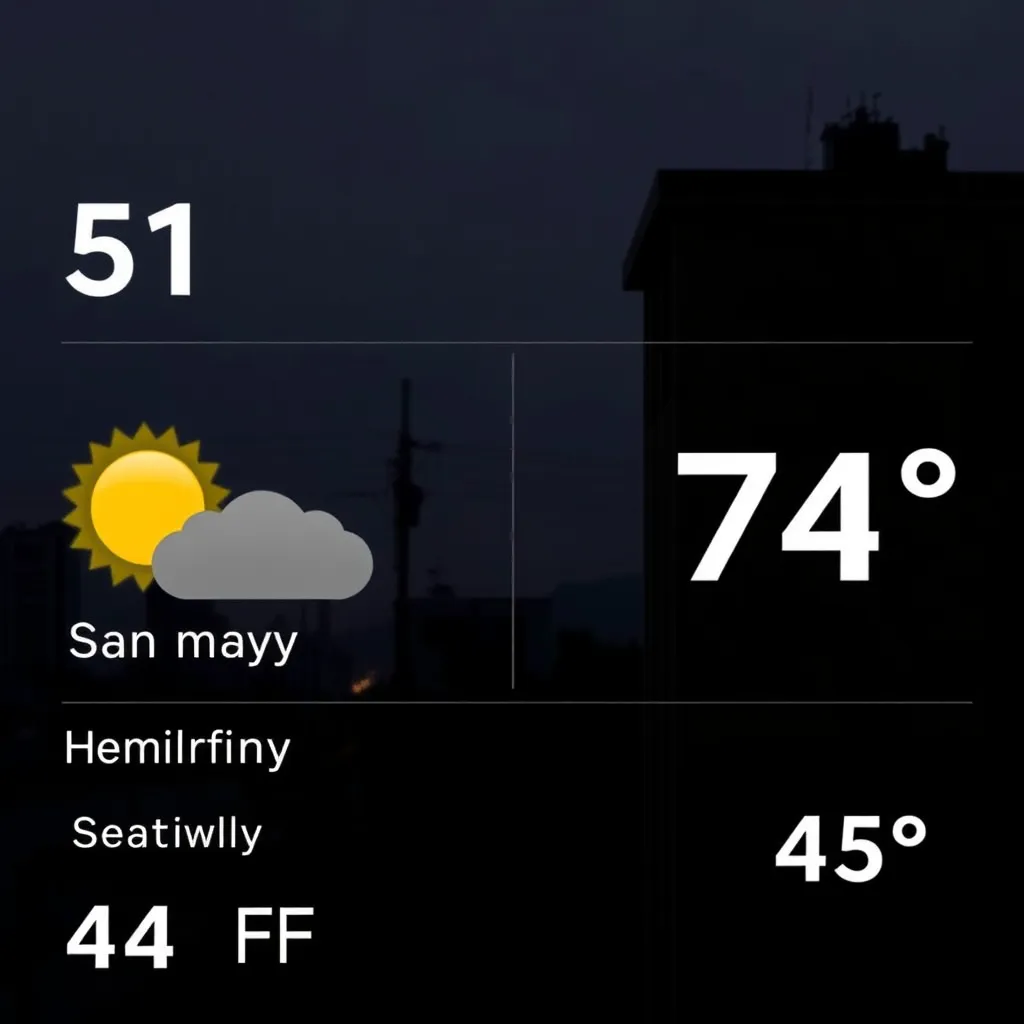

In [28]:
from IPython.display import Image, display

display(Image(filename='/private/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/gradio/cc514ca315cb91a3d754089fe97943cf17495d88416707e0b9b528c5b812a152/image.webp'))
